# 1. MNIST 데이터셋

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("mnist_train_small.csv", header=None)
data = np.array(data)

In [2]:
print(data)
print(data.shape)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
(20000, 785)


In [3]:
# 데이터를 조금 더 자세히 살펴보기 위해 한 줄만 표시
print(data[0, :])

[  6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24  67  67
  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 131 252 252  66   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 159 250
 232  30  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  15 222 252 108   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 147
 252 183   5   0   0   0   0   0   0   0  20  89  8

In [4]:
# 배열 슬라이싱을 사용하여 정답 정보와 이미지 데이터 분리
# reshape 함수를 사용하여 길이 784인 1차원 배열을 28 * 28의 2차원 배열로 변환
X_train = data[:, 1:]
y_train = data[:, 0]
X_train = X_train.reshape(-1, 28, 28)

In [5]:
# 바뀐 배열의 모양 확인
X_train.shape

(20000, 28, 28)

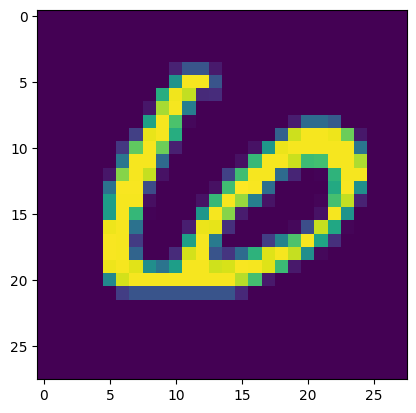

In [6]:
# matplotlib을 사용하여 이미지 표시
# MNIST 데이터셋의 첫 번째 데이터를 이미지로 표현
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :]);

In [7]:
import keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [8]:
# X_train 변수는 현재 3차원(20,000*28*28)이므로 expand_dims 함수를 사용하여 이를 4차원(20,000*28*28*1)으로 수정
# 타깃 정보는 to_categorical 함수를 사용하여 원-핫-인코딩 방식으로 변환
X_train = np.expand_dims(X_train, -1)
y_train = keras.utils.to_categorical(y_train)

In [9]:
# 손 글씨를 인식하기 위한 네트워크 구조 구현
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size=3, input_shape=(28, 28, 1), activation="relu"))
model.add(layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model.add(layers.MaxPooling2D(strides=2, padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])

- 이미지를 위한 2차원 합성곱층은 케라스에서 Conv2D로 기술
- MaxPooling층은 MaxPooling2D, Flatten층은 Flatten으로 기술
- 이 코드에는 합성곱층을 정의할 때 3~4개의 파라미터를 사용했는데, filters는 합성곱에 사용할 필터의 개수, kernel_size는 필터의 너비/높이, input_shape는 입력 데이터의 모양(크기), activation은 활성화 함수의 종류를 뜻함
- MaxPooling층은 2개의 파라미터를 가지는데, pool_size와 strides는 각각 풀의 크기와 풀이 한번에 이동하는 크기를 뜻함
- 완전 연결층을 추가하고 모델을 컴파일하는 과정은 완전 연결 신경망을 구성할 때와 동일

In [10]:
# 구성된 모델을 사용하여 학습
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10


219/219 [==============================] - 3s 7ms/step - loss: 2.8553 - accuracy: 0.8312 - val_loss: 0.2551 - val_accuracy: 0.9352
Epoch 2/10
219/219 [==============================] - 1s 6ms/step - loss: 0.1706 - accuracy: 0.9552 - val_loss: 0.1657 - val_accuracy: 0.9548
Epoch 3/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0885 - accuracy: 0.9754 - val_loss: 0.1367 - val_accuracy: 0.9648
Epoch 4/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.1304 - val_accuracy: 0.9707
Epoch 5/10
219/219 [==============================] - 1s 6ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 0.1595 - val_accuracy: 0.9680
Epoch 6/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.1286 - val_accuracy: 0.9728
Epoch 7/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.1557 - val_accuracy: 0.9712
Epoc

In [11]:
# 테스트
data = pd.read_csv("mnist_test.csv")
data = np.array(data)

- 입력 데이터와 타깃 데이터로 분리하고, 입력 데이터는 reshape 함수를 사용하여 (샘플 수 * 이미지 높이 * 이미지 너비 * 1) 크기로 조정
- 이와 같이 reshape 함수를 사용하여 한번에 조정할 수도 있음

In [12]:
X_test = data[:, 1:]
y_test = data[:, 0]
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
# 입력 데이터를 사용하여 결과를 예측하고, 원-핫-인코딩 방식의 결과를 argmax 함수를 사용하여 0에서 9까지의 숫자로 변환
# 변수 o에는 각 입력 데이터에 대한 예측 결과가 저장
o = model.predict(X_test)
o = np.argmax(0, -1)

313/313 [==============================] - 1s 2ms/step


In [14]:
# 테스트 결과의 정확도
sum(y_test == 0) / len(y_test)

0.09800980098009801